<h1 align="center" style="color:red;">NEUROLIB fLDS DEMONSTRATION</h1> 

In this notebook the `neurolib` implementation of fLDS is illustrated.

In [4]:
from IPython.display import HTML
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import pickle
import os
path = '/'.join(os.getcwd().split('/')[:-2])
sys.path.append(path)

## Preparing a dataset for neurolib-fLDS training

The analysis in this tutorial is run on a synthetic dataset of 80 trials, each consisting of 30-step sequences of 20D observations. This dataset was generated 'on top' of a 2D state space, evolving following a nonlinear law. In this tutorial the neurolib-fLDS implementation will be used to ascertain what can be expected of fLDS when handling a nonlinear dataset.

In [7]:
fname = 'datadict_gaussianobs2D'
with open(fname, 'rb') as f:
  datadict = pickle.load(f)

In order for a `neurolib` **model** to use a dataset, whether for training or analysis, the dataset must be a python `dict` with specific keys corresponding to the Model nodes. For fLDS training, the neurolib requires the user to provide training and validation data with keys `train_Observation` and `valid_Observation` respectively.

The loaded dataset is a python dict as the `neurolib` requires. However, in order to fit a specific `neurolib` model, the keys in the dataset should also match the expectations of that particular model. Typically, this will not be the case...

In [8]:
datadict.keys()

dict_keys(['Yvalid', 'Ytest', 'Xtest', 'Xtrain', 'Xvalid', 'Ytrain'])

`neurolib`'s fLDS expects the keys of the training and validation data to be set to `train_Observation` and `valid_Observation` respectively. This is done next.

In [9]:
dataset = {}
Ytrain = datadict['Ytrain']
Yshape = Ytrain.shape
print("Yshape", Yshape)
dataset['train_Observation'] = Ytrain
dataset['valid_Observation'] = datadict['Yvalid']

Yshape (80, 30, 20)


# Import fLDS

In [6]:
from neurolib.models.flds import fLDS

## Instantiating the fLDS Model class

The basic component of the neurolib is the **Model**, a class from which specific models like Regression, fLDS or VIND inherit.

There are (currently) two **modes** by which a fLDS model can be defined, which are specified by the argument `mode`. One one hand, it is possible to initialize a brand new, untrained model. This is done by setting `mode='train'`; which is also the default mode. 

On the other hand, it is possible to *restore* an already trained model from disk. In what follows, we **build** a brand new fLDS model.

In order to be built, a model typically must be provided with a few mandatory arguments. Moreover, the model *may* be provided with many optional arguments (over 30 in the case of fLDS), that range from hyperparameters to neural network architecture to options for training. For this basic tutorial we will simply use the defaults for all the optional arguments.

Mandatory fLDS arguments for a brand new model are:

`main_input_dim` :  The dimensionality of the data

`state_dim` : The dimensionality of the latent space

`max_steps` : The length of the data sequences.

Additionally we will set the optional argument `save_on_valid_improvement` to `True` since we also want to restore the model later.

In [10]:
max_steps, input_dim = Yshape[-2], Yshape[-1]
flds = fLDS(main_input_dim=input_dim,
            state_dim=[[2]],
            max_steps=max_steps,
            save_on_valid_improvement=True)

builder, main_inputs ['Observation']
ds_inputs ['LDS']
builder, main_inputs ['Posterior']
Building all outputs,  Recognition
	Building loc,  Recognition
	Building prec,  Recognition
	Building main,  Recognition
Building all outputs,  LDS
	Building A,  LDS
	Building loc,  LDS
	Building prec, scale,  LDS
	Building main,  LDS
Building all outputs,  Posterior
	Building invscale, Posterior
	Building loc, Posterior
	Building main, Posterior
Building all outputs,  Generative
	Building loc,  Generative


/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


	Building prec,  Generative
	Building main,  Generative
	Building loc,  Generative
		Updating defaults, Generative with ['imain0']


/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


Building entropy,  Posterior
Building logprob,  Generative
Building logprob,  LDS
	Building loc,  LDS
		Updating defaults with ['imain0'] , LDS

Scope: fLDS
     0 fLDS/Prior_loc/loc:0 [2]
     1 fLDS/Prior_scale/scale:0 [2, 2]
     2 fLDS/Recognition_loc/fully_connected/weights:0 [20, 64]
     3 fLDS/Recognition_loc/fully_connected/biases:0 [64]
     4 fLDS/Recognition_loc/fully_connected_1/weights:0 [64, 64]
     5 fLDS/Recognition_loc/fully_connected_1/biases:0 [64]
     6 fLDS/Recognition_loc/fully_connected_2/weights:0 [64, 2]
     7 fLDS/Recognition_loc/fully_connected_2/biases:0 [2]
     8 fLDS/Recognition_precision/fully_connected/weights:0 [20, 64]
     9 fLDS/Recognition_precision/fully_connected/biases:0 [64]
     10 fLDS/Recognition_precision/fully_connected_1/weights:0 [64, 64]
     11 fLDS/Recognition_precision/fully_connected_1/biases:0 [64]
     12 fLDS/Recognition_precision/fully_connected_2/weights:0 [64, 4]
     13 fLDS/Recognition_precision/fully_connected_2/biases:

When a brand new model is initialized, its underlying tensorflow graph is built. Some information regarding the graph is displayed for the convenience of the user.

- **Block number 1** tracks the process of building the Model graph. This is potentially useful to track whether the nodes and tensors are being constructed in the right order and for debugging.

- **Block number 2** lists, once the model is built, all of its tensorflow TRAINABLE variables. For instance, it can be seen above that this fLDS architecture includes 4 neural networks, each 2 hidden layers deep.

- **Block number 3** shows a list of **output names**. These correspond to tensors that are available for evaluation using the model's `eval` method. More on this in a moment

### Training a model

Training a model is as easy as calling the model's `train` method. Mandatory arguments are a `dataset`, whose keys should follow neurolib's expectations, and the number of epochs `num_epochs`.

In [11]:
flds.train(dataset, num_epochs=5)

Saving in rslts/fLDS/D190302_0815/
time: 2.180328130722046
ep, cost: 0, 702.323171849034
Valid. cost: 863.5664579081771 ... Saving...

time: 2.014031171798706
ep, cost: 1, 256.28388930226
Valid. cost: 365.35740731312075 ... Saving...

time: 2.04842209815979
ep, cost: 2, -83.31804809001952
Valid. cost: -116.40831035244359 ... Saving...

time: 2.067751169204712
ep, cost: 3, 2.2488428327719476
time: 2.0339720249176025
ep, cost: 4, -235.9170082891212
Valid. cost: -265.76768599186295 ... Saving...



## Analysis

Names available for evaluation are listed when a Model is **built** or **restored**. For example, the dynamics matrix $A$ found by fLDS can be immediately evaluated.

In [12]:
flds.eval(dataset, 'LDS:A', key='valid')

array([[ 1.00025906e+00, -1.78030595e-03],
       [-9.43707595e-04,  1.01921447e+00]])

The inferred state-space paths are also immediately available for evaluation from the name `'Posterior:loc'`. Let us plot then and see what fLDS has found.

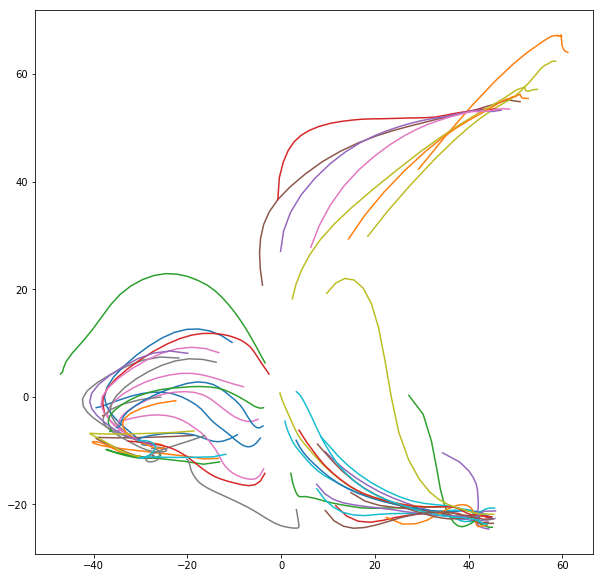

In [13]:
X = flds.eval(dataset, 'Posterior:loc', key='train')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
for i in range(0, 50):
    ax1.plot(X[i,:,1], X[i,:,0])

The fLDS representation appears to show some fixed points, a feature that points to an underlying nonlinear dynamics. We don't expect a Linear Dynamical System to provide an accurate description of the evolution in this case. But fLDS still does well in representing the paths.

Another thing that is suggested by these paths is that the underlying dynamics is indeed 2D. This is because 2D space is topologically "tight" for 1D paths. Hence, if the true dynamics was higher than 2D, one would expect paths to intertwine in a 2D representation of it.

For convenience, fLDS models are also endowed with a method `eval_posterior` that returns the inferred paths

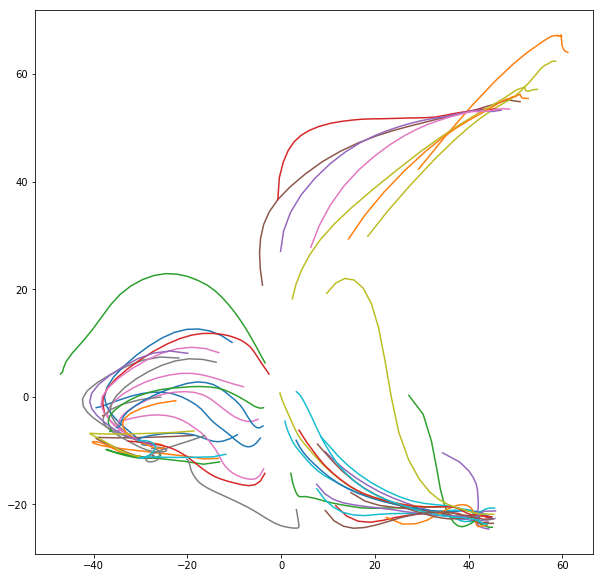

In [14]:
X = flds.eval_posterior(dataset, key='train')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
for i in range(0, 50):
    ax1.plot(X[i,:,1], X[i,:,0])

Due to its nonlinear evolution, we do *not* expect the trained fLDS's dynamics to interpolate well this dataset. To test this, it is possible to compute the $kR^2$ on validation data by calling directly the `anal_kR2$ method.

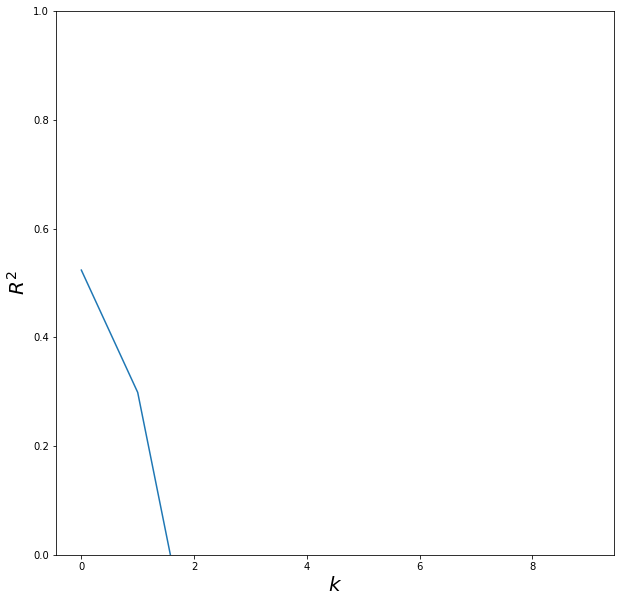

In [15]:
kR2 = flds.anal_kR2(dataset, key='valid')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$k$', fontsize=20)
ax1.set_ylabel(r'$R^2$', fontsize=20)
ax1.set_ylim(ymin=0.0, ymax=1.0)
ax1.plot(kR2)